In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as patches
from numpy import *

Text(0.5, 0, 'Components')

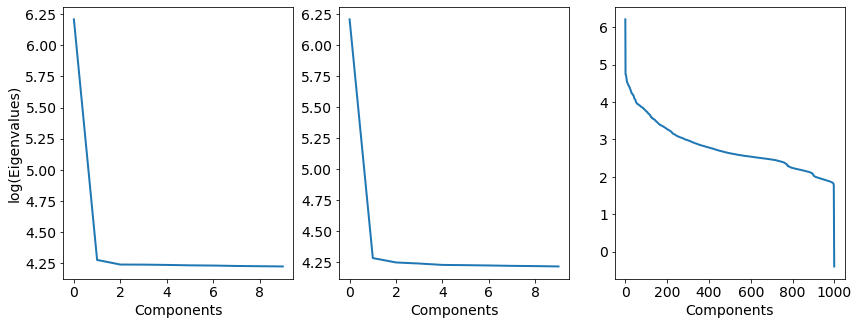

In [8]:
# Analysis eigenvalues from raw data with 240x244x1000
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/EDS_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
e1 = e1[::-1]
plt.plot(np.log(e1[0:10]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=35,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
e2 = e2[::-1]
plt.plot(np.log(e2[0:10]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=38,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:1000]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=200,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

Text(0.5, 0, 'Components')

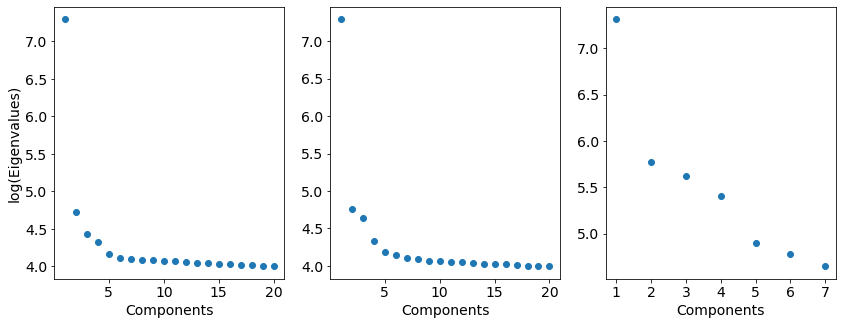

In [22]:
# Analysis eigenvalues from raw data with 240x244x7 channels
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/EDS_grouped_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
e1 = e1[::-1]
plt.plot(np.linspace(1,20,20),np.log(e1[0:20]),'o',linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=35,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
e2 = e2[::-1]
plt.plot(np.linspace(1,20,20),np.log(e2[0:20]),'o',linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=38,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.linspace(1,7,7),np.log(e3),'o',linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=200,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

In [25]:
# Analysis denoise results from grouped EDS data
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/EDS_denoised_grouped_4-4-7.mat')
denoised = temp['est_HOOI']
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/EDS_grouped.mat')
noisy = temp['datacube']

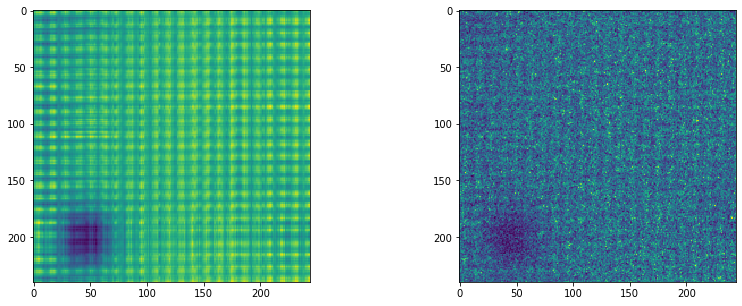

In [26]:
fig = plt.figure(figsize=(14,5))

fig.add_subplot(121)
plt.imshow(denoised[:,:,2])

fig.add_subplot(122)
plt.imshow(noisy[:,:,2])